In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
RANDOM_SEED = 2021 
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]

In [21]:
dataset = pd.read_csv("creditcard.csv")
print(list(dataset.columns))
dataset.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
#check for any  nullvalues 
print("Any nulls in the dataset ",dataset.isnull().values.any() )
print('-------')
print("No. of unique labels ", len(dataset['Class'].unique()))
print("Label values ",dataset.Class.unique())
#0 is for normal credit card transaction
#1 is for fraudulent credit card transaction
print('-------')
print("Break down of the Normal and Fraud Transactions")
print(dataset['Class'].value_counts(sort=True))


Any nulls in the dataset  False
-------
No. of unique labels  2
Label values  [0 1]
-------
Break down of the Normal and Fraud Transactions
Class
0    284315
1       492
Name: count, dtype: int64


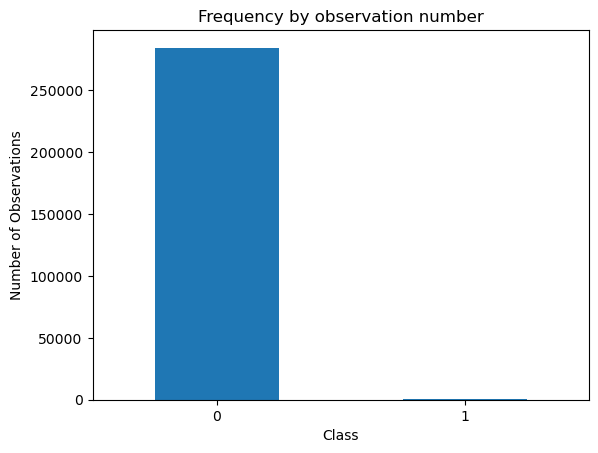

In [23]:
#Visualizing the imbalanced dataset
count_classes = count_classes = dataset['Class'].value_counts(sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(dataset['Class'].unique())), dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

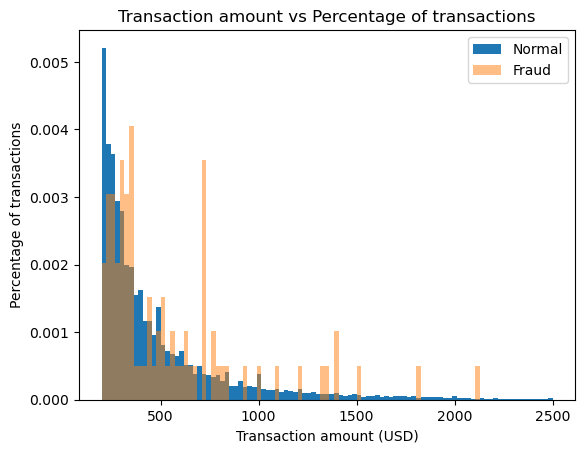

In [24]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = dataset[dataset.Class == 0] 
fraud_dataset = dataset[dataset.Class == 1]
#Visualize transactionamounts for normal and fraudulent transactions
bins = np.linspace(200, 2500, 100) # Return evenly spaced numbers over a specified interval.
plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

In [25]:
'''Time and Amount are the columns that are not scaled, so applying StandardScaler to only Amount and Time columns. 
Normalizing the values between 0 and 1 did not work great for the dataset.'''

'Time and Amount are the columns that are not scaled, so applying StandardScaler to only Amount and Time columns. \nNormalizing the values between 0 and 1 did not work great for the dataset.'

In [26]:
sc=StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [27]:
dataset['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [28]:
train_x, test_x = train_test_split(dataset, test_size=TEST_PCT, random_state=RANDOM_SEED)
train_x = train_x[train_x.Class == 0]       # where normal transactions
train_x = train_x.drop(['Class'], axis=1)   # drop the class column


test_y = test_x['Class']                    # save the class column for the test set
test_x = test_x.drop(['Class'], axis=1)     # drop the class column

train_x = train_x.values                    # transform to ndarray
test_x = test_x.values                      # transform to ndarray

#### Autoencoder Layer Structure and Parameters
Autoencoder has symmetric encoding and decoding layers that are "dense". We are reducing the input into some form of simplified encoding and then expanding it again. The input and output dimension is the feature space (e.g. 30 columns), so the encoding layer should be smaller by an amount that expect to represent some feature. In this case, I am encoding 30 columns into 14 dimensions so I am expecting high-level features to be represented by roughly two columns (30/14 = 2.1). Of those high-level features, I am expecting them to map to roughly seven hidden/latent features in the data.

Additionally, the epochs, batch size, learning rate, learning policy, and activation functions were all set to values empirically good values.

In [29]:
nb_epoch = 10
batch_size = 64
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4  
learning_rate = 1e-7

In [30]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",                                
                        activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
# encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 30)                  │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
"""Define the callbacks for checkpoints and early stopping"""

cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.keras",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [32]:
#Compile the Autoencoder

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [33]:
#Train the Autoencoder

history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history


Epoch 1/10
3107/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3133 - loss: 0.8725
Epoch 1: val_loss improved from None to 0.76797, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.3768 - loss: 0.8013 - val_accuracy: 0.4233 - val_loss: 0.7680
Epoch 2/10
3103/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4211 - loss: 0.7226
Epoch 2: val_loss improved from 0.76797 to 0.73310, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4190 - loss: 0.7173 - val_accuracy: 0.4080 - val_loss: 0.7331
Epoch 3/10
3096/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4074 - loss: 0.6904
Epoch 3: val_loss improved from 0.73310 to 0.71669, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4076 - loss: 0.6909 - val_accuracy: 0.4073 - val_loss: 0.7167
Epoch 4/10
3091/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4074 - loss: 0.6723
Epoch 4: val_loss improved from 0.71669 to 0.70817, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4095 - loss: 0.6800 - val_accuracy: 0.4107 - val_loss: 0.7082
Epoch 5/10
3107/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4110 - loss: 0.6702
Epoch 5: val_loss improved from 0.70817 to 0.70069, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4095 - loss: 0.6729 - val_accuracy: 0.4093 - val_loss: 0.7007
Epoch 6/10
3099/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4108 - loss: 0.6642
Epoch 6: val_loss improved from 0.70069 to 0.69782, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4126 - loss: 0.6675 - val_accuracy: 0.4143 - val_loss: 0.6978
Epoch 7/10
3094/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4128 - loss: 0.6561
Epoch 7: val_loss improved from 0.69782 to 0.69292, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4137 - loss: 0.6637 - val_accuracy: 0.4151 - val_loss: 0.6929
Epoch 8/10
3109/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4171 - loss: 0.6916
Epoch 8: val_loss improved from 0.69292 to 0.69048, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4159 - loss: 0.6599 - val_accuracy: 0.4173 - val_loss: 0.6905
Epoch 9/10
3092/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4162 - loss: 0.6515
Epoch 9: val_loss improved from 0.69048 to 0.68766, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4174 - loss: 0.6571 - val_accuracy: 0.4197 - val_loss: 0.6877
Epoch 10/10
3088/3110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4183 - loss: 0.6638
Epoch 10: val_loss improved from 0.68766 to 0.68612, saving model to autoencoder_fraud.h5


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4180 - loss: 0.6548 - val_accuracy: 0.4267 - val_loss: 0.6861
Restoring model weights from the end of the best epoch: 10.


Epoch 27/50
3107/3110 [============================>.] - ETA: 0s - loss: 0.6217 - accuracy: 0.4244
Epoch 27: val_loss did not improve from 0.65362
3110/3110 [==============================] - 7s 2ms/step - loss: 0.6218 - accuracy: 0.4243 - val_loss: 0.6539 - val_accuracy: 0.4239
Epoch 28/50
3103/3110 [============================>.] - ETA: 0s - loss: 0.6209 - accuracy: 0.4243
Epoch 28: val_loss improved from 0.65362 to 0.65312, saving model to autoencoder_fraud.h5
3110/3110 [==============================] - 8s 2ms/step - loss: 0.6210 - accuracy: 0.4242 - val_loss: 0.6531 - val_accuracy: 0.4232
Epoch 29/50
3084/3110 [============================>.] - ETA: 0s - loss: 0.6197 - accuracy: 0.4248
Epoch 29: val_loss improved from 0.65312 to 0.65224, saving model to autoencoder_fraud.h5
3110/3110 [==============================] - 7s 2ms/step - loss: 0.6203 - accuracy: 0.4247 - val_loss: 0.6522 - val_accuracy: 0.4231
Epoch 30/50
3105/3110 [============================>.] - ETA: 0s - loss: 0.6

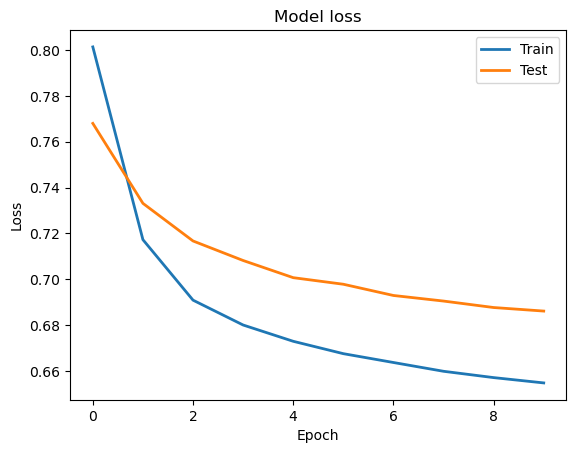

In [34]:
#Plot training and test loss

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [35]:
"""Detect Anomalies on test data

Anomalies are data points where the reconstruction loss is higher

To calculate the reconstruction loss on test data, 
predict the test data and calculate the mean square error between the test data and the reconstructed test data."""

test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df.describe()

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step  


,Reconstruction_error,True_class
count,85443.000000,85443.000000
mean,0.686077,0.001662
std,3.535686,0.040733
min,0.027409,0.000000
25%,0.172961,0.000000
50%,0.305834,0.000000
75%,0.547780,0.000000
max,299.947340,1.000000


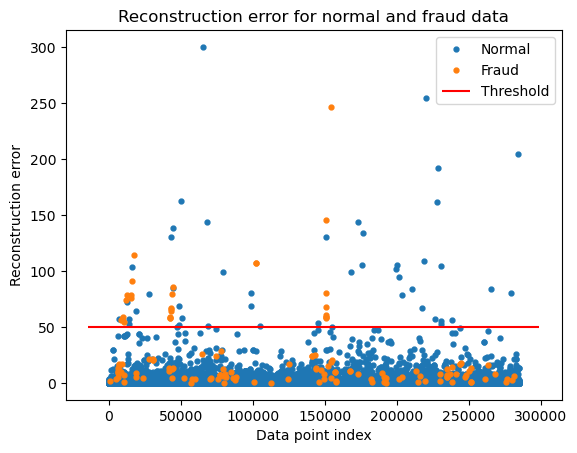

In [36]:
#Plotting the test data points and their respective reconstruction error sets a threshold value to visualize 
#if the threshold value needs to be adjusted.

threshold_fixed = 50
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

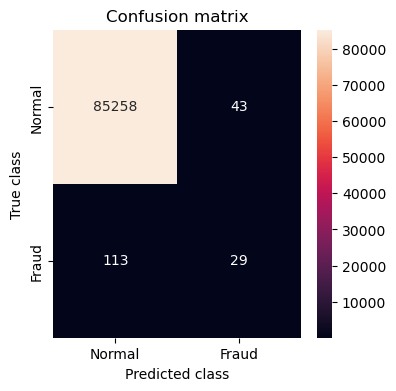

 Accuracy:  0.9981742214107651
 Recall:  0.20422535211267606
 Precision:  0.4027777777777778


In [39]:
'''Detect anomalies as points where the reconstruction loss is greater than a fixed threshold. 
Here we see that a value of 52 for the threshold will be good.

Evaluating the performance of the anomaly detection'''

threshold_fixed =52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))

In [ ]:
'''As our dataset is highly imbalanced, we see a high accuracy but a low recall and precision.

Things to further improve precision and recall would add more relevant features, 
different architecture for autoencoder, different hyperparameters, or a different algorithm.'''